In [1]:
import pandas as pd
from collections import Counter
import re

### Regex

#### Sostituisci i numeri con un qualsiasi placeholder

In [13]:
#sostituisci tutti i caratteri numerici con la parola digit
df["prova"] = df["Campaign+Placement+Adgroup"].str.replace(r'\d+', 'digit')

#### Individua determinati pattern che non contengano altri pattern

In [74]:
pattern = "^(?=.*?(tasty-treats))((?!chocolate).)*$"

string = 'Che tasty-treats '


match = re.search(pattern, string) 

if match:
  print(match.group())
else:
  print("pattern not found")

Che tasty-treats 


In [41]:
pattern = "\b(?!(?:custom|onetomany|manytomany|atom|tomcat|tomorrow|automatic)\b)[a-z]*tom[a-z]*\b"

string = 'customers '


match = re.search(pattern, string) 

if match:
  print(match.group())
else:
  print("pattern not found")

pattern not found


### [Rimuovi tutto quello che viene dopo un separatore (rimuove anche il separatore)](https://stackoverflow.com/a/58738829/10832916)

In [21]:
'''strs = ["Acquisizione_Fisso_Programmatic-Open_Amazon_Fibra_Prospecting-Gamers_CPM_Self",
        "Affiliazione_Acquisizione_Fisso_AWIN_Fibra_Cashback-Content-Couponing_CPA_Self_animato",
        "MYN-AW-TimStrategy-MasterclassRilancio_MYN-AW-Captify-TimStrategy-MasterclassRilancio-Mix display_Captify_Persone",
        "TF_[MARKET]_FWA_Ricaricabile_Exact_Google AdWords_MARKET_Internet"]
df = pd.DataFrame(data={'SOURCE_NAME': strs})
df['SOURCE_NAME'].str.split('_', 2).str[0]
df['SOURCE_NAME'].str.rsplit('_').str.get(5)
'''
df = pd.read_excel("C:/Users/11622901/JupyterLab/Sources/categorie1.xlsx")

df["Targeting"] = df["Key"].str.split('_').str.get(5)
df["Buying"] = df["Key"].str.split('_').str.get(6)

df.to_excel("C:/Users/11622901/JupyterLab/Sources/categorie2.xlsx")



### [Rimuovi una lista di parole da una stringa](https://stackoverflow.com/a/25346119/10832916)

In [79]:
query = 'Acquisizione_Fisso_Programmatic-Open_DV360_Acquisizione_Fisso_Programmatic-Open_DV360_Fibra_Prospecting-ISP-Fastweb-B-Strategy_CPM_Self_160x600_TIM_29.90_2-Sep'
stopwords = ["0","1","2","3","4","5","6","7","8","9","_x_._-Sep", "_TIM_Acqu", "_,_Settembre", "_,_Agosto", "_x", ".x"]
querywords = query.split("x")

resultwords  = [word for word in querywords if word.lower() not in stopwords]
result = '_'.join(resultwords)

print(result)

Acquisizione_Fisso_Programmatic-Open_DV360_Acquisizione_Fisso_Programmatic-Open_DV360_Fibra_Prospecting-ISP-Fastweb-B-Strategy_CPM_Self_TIM_29.90_2-Sep


### [Funzione per rimuovere le parole duplicate da una stringa](https://www.geeksforgeeks.org/python-remove-duplicates-words-given-sentence/)

In [36]:
from collections import Counter 
  
def remov_duplicates(input): 
  
    # split input string separated by space 
    input = input.split("_") 
  
    # joins two adjacent elements in iterable way 
    for i in range(0, len(input)): 
        input[i] = "".join(input[i]) 
  
    # now create dictionary using counter method 
    # which will have strings as key and their  
    # frequencies as value 
    UniqW = Counter(input) 
  
    # joins two adjacent elements in iterable way 
    s = "_".join(UniqW.keys()) 
    return s
    


In [9]:
xls = pd.ExcelFile("C:/Users/11622901/JupyterLab/Sources/prova1.xlsx")
df = pd.read_excel(xls, "ricatalogazione")
#tipologia = pd.read_excel(xls, "tipologia")
#canale = pd.read_excel(xls, "canale")
#prodotto = pd.read_excel(xls, "prodotto")


### Pulizia della concatenazione Campaign+Placement+Banner/AdGroup

In [106]:
filename = 'C:/Users/11622901/JupyterLab/Sources/parametriche.xlsx'
parametriche = pd.ExcelFile(filename)
categorie = pd.read_excel(parametriche, 'categorie')


In [107]:
fibra = pd.read_excel(parametriche, 'fibra')
opzioni = pd.read_excel(parametriche, 'opzioni')
mobile = pd.read_excel(parametriche, 'mobile')

In [113]:
# Rimuovi tutti i numeri e rimuovi i duplicati 
trans_dict ={"0":None, "1":None, "2":None, "3":None, "4":None, "5":None, "6":None, "7":None, "8":None,"9":None,"'":None} 
string = ''.join([f'{key}' for key in trans_dict.keys()])
trans_table =string.maketrans(trans_dict) 
categorie['Key_New'] = categorie['Key'].str.translate(trans_table).apply(lambda x: remov_duplicates(x))

fibra.fillna("", inplace=True)
fibra["Banner/Adgroup"] = fibra["Banner/Adgroup"].astype(str)
fibra["Key"] = fibra[["Campaign", "Placement", "Banner/Adgroup"]].apply(lambda x: '_'.join(x), axis=1)
fibra['Key_New'] = fibra['Key'].str.translate(trans_table).apply(lambda x: remov_duplicates(x))

opzioni.fillna("", inplace=True)
opzioni["Key"] = opzioni[["Campaign", "Placement", "Banner/Adgroup"]].apply(lambda x: '_'.join(x), axis=1)
opzioni['Key_New'] = opzioni['Key'].str.translate(trans_table).apply(lambda x: remov_duplicates(x))

mobile.fillna("", inplace=True)
mobile["Key"] = mobile[["Campaign", "Placement", "Banner/Adgroup"]].apply(lambda x: '_'.join(x), axis=1)
mobile['Key_New'] = mobile['Key'].str.translate(trans_table).apply(lambda x: remov_duplicates(x))

# Rimuovi alcune stopwords
stopwords = [",", ".", "..", "...", "-", "-..", "_", "€", "€.", "/", "// ", "//", "&", ".x", "x", "v", "A", "B", "C", "D",  "G", "V", "TIM", "Acqu", "banner-gif-x", "MYN", "NO", "Gen", "Feb", "Mar", "Apr", "May", "June", "Jun-", "Jul", "July", "Aug", "-Sep", "Sep", "Oct","Nov", "Agosto", "Settembre", "Ottobre"]
categorie['Key_New'] = categorie['Key_New'].apply(lambda x: '_'.join([item for item in x.split("_") if item not in stopwords]))
fibra['Key_New'] = fibra['Key_New'].apply(lambda x: '_'.join([item for item in x.split("_") if item not in stopwords]))
opzioni['Key_New'] = opzioni['Key_New'].apply(lambda x: '_'.join([item for item in x.split("_") if item not in stopwords]))
mobile['Key_New'] = mobile['Key_New'].apply(lambda x: '_'.join([item for item in x.split("_") if item not in stopwords]))


In [114]:
categorie.to_excel('C:/Users/11622901/JupyterLab/Sources/categorie.xlsx')
fibra.to_excel('C:/Users/11622901/JupyterLab/Sources/fibra.xlsx')
opzioni.to_excel('C:/Users/11622901/JupyterLab/Sources/opzioni.xlsx')
mobile.to_excel('C:/Users/11622901/JupyterLab/Sources/mobile.xlsx')

### Associa le categorie a Campaign+Placement+Banner/AdGroup

In [ ]:
acquisizione_fisso = "^(?=.*?(fisso|supe|fibra))((?!(pack|promopack)).)*$"
>>> s[s.str.contains('|'.join(searchfor))]

assistenza_words = '|'.join(["Assistenza TIM","Disdetta Telecom"])
no_paid_words = '|'.join(["APP-TIM_MyTIM", "AliceMail", "Mail TIM_Alice Mail", "DEM-Interne"])

# create a list of our conditions
conditions = [
    df['Key'].str.contains(r''),
    df['Key'].str.contains(r'Acquisizione_Fisso'),
    df['Key'].str.contains(r'Acquisizione_Mobile'),
    df['Key'].str.contains(assistenza_words),
    df['Key'].str.contains(r'-AW-'),
    df['Key'].str.contains(no_paid_words),
    df['Key'].str.contains(r'Upselling_Fisso'),
    df['Key'].str.contains(r'Upselling_Mobile'),
    ]

# create a list of the values we want to assign for each condition
values = ["Acquisizione Fisso", "Acquisizione Mobile", "Assistenza e Altro Mobile", "Awareness", "No Paid", "Upselling Fisso", "Upselling Mobile"]

# create a new column and use np.select to assign values to it using our lists as arguments
df['Tipologia Campagna'] = np.select(conditions, values, default="")

# display updated DataFrame
df.head()


#df["Tipologia"] = df["Campaign+Placement+Adgroup"].str.replace(r'\d+', 'digit')

In [48]:
acquisizione_fisso =re.compile("^(?=.*?(fisso|supe|fibra))((?!(pack|promopack|upselling)).)*$", re.IGNORECASE)
df.loc[df["Campaign+Placement+Adgroup"].str.contains(acquisizione_fisso),"Campaign+Placement+Adgroup"].to_excel("C:/Users/11622901/JupyterLab/Sources/ppp.xlsx")

In [21]:
pd.set_option('display.max_colwidth', None)
print(df.loc[df["prova"].str.contains("digit"),["Campaign+Placement+Adgroup","prova"]])

                                                                                                                                                                                           Campaign+Placement+Adgroup  \
1                                                                                                Acquisizione_Fisso_Conversion-Booster_Fanplayr_Fanplayr Bonus 2 Mesi_TIM_Fanplayr_Bonus-2-Mesi_CPA_SuperFibra_Jun-20   
2                                                                                                      Acquisizione_Fisso_Conversion-Booster_Fanplayr_Fanplayr Disney +_Native_TIM_Fanplayr_Disney_PromoPack_2020July   
3                                                                                                             Acquisizione_Fisso_Conversion-Booster_Fanplayr_FANPLAYR_Fibra € 29,90_CPA_TIM_Fanplayr_Fibra_€29.99_CPA   
4                                                                                     Acquisizione_Fisso_Conversion-Booster_Fanplayr

# Parole più frequenti

In [373]:
canali = df["Canale"].unique()
lista = []

for c in canali:
    lista.append(Counter(" ".join(df.loc[df['Canale'] == c, "Campaign+Placement+Adgroup"]).split("_")).most_common(20))

df_l = pd.DataFrame(lista)
df_l = df_l.transpose()
df_l.columns = df["Canale"].unique()
df_l.to_excel("~/Downloads/parole_frequenti_CANALI.xlsx")

In [7]:
attivita = df["Tipologia Campagna"].unique()
lista_attivita = []

for a in attivita:
    lista_attivita.append(Counter(" ".join(df.loc[df['Tipologia Campagna'] == a, "Campaign+Placement+Adgroup"]).split("_")).most_common(100))

df_l_a = pd.DataFrame(lista_attivita)
df_l_a = df_l_a.transpose()
df_l_a.columns = df["Tipologia Campagna"].unique()
df_l_a.to_excel("~/Downloads/parole_frequenti_TIPOLOGIA.xlsx")

In [ ]:
pd.DataFrame(df_l["No Paid"].tolist())

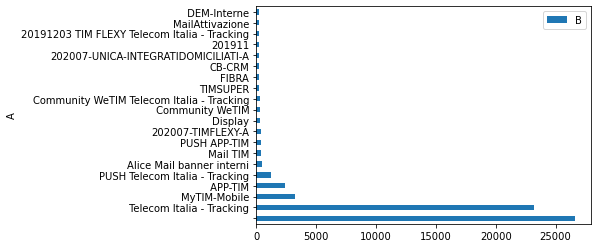

In [77]:
new_col_list = ['A','B']
for n,col in enumerate(new_col_list):
    df_l[col] = df_l['No Paid'].apply(lambda x: x[n])

df_l[["A","B"]].plot.barh(x="A",y="B")
#df = df.drop('No Paid',axis=1)

# Ricatalogazione

In [2]:
xls = pd.ExcelFile("C:/Users/11622901/JupyterLab/Sources/ricatalogazione_canali.xlsx")
df = pd.read_excel(xls, "ricatalogazione")
tipologia = pd.read_excel(xls, "tipologia")
canale = pd.read_excel(xls, "canale")
prodotto = pd.read_excel(xls, "prodotto")


In [371]:
df.to_excel("~/Downloads/ricatalogazione.xlsx")

In [3]:
campi = ["Tipologia Campagna","Canale","Prodotto"]
dataframes = [tipologia,canale, prodotto]


duz = {}
for campo, dataframe in zip(campi,dataframes):
    dataframe.fillna("x", inplace=True)
    
    diz = {}
    for i, col in enumerate(dataframe.columns):
        diz[i] = dataframe[col].unique().tolist()
        diz[col] = diz.pop(i)

        for k,v in diz.items():
            if "x" in v:
                v.remove("x")
            else:
                v

    duz[campo] = diz

for campo, valore in duz.items():
    for inner_campo, inner_valore in valore.items():
        if inner_valore == []:
            pass
        else:
            df.loc[df["Campaign+Placement+Adgroup"].str.contains("|".join(inner_valore), regex=False), campo] = inner_campo

In [4]:
duz

{'Tipologia Campagna': {'Acquisizione Fisso': ['tim_clienti_mobile_fibra'],
  'Acquisizione Mobile': ['Mobile'],
  'Acquisizione Intrattenimento': [],
  'Upselling Fisso': ['PromoPack', 'Promo Pack', 'Upselling_Fisso'],
  'Upselling Mobile': [],
  'Crosselling Fisso': [],
  'Crosselling Mobile': []},
 'Canale': {'Affiliazione Indiretta': ['Affiliazione'],
  'Affiliazione Comparatori': ['Comparatori'],
  'Conversion Booster': ['Fanplayr', 'ConversionBooster'],
  'DEM': ['DEM'],
  'Display Reservation': [],
  'Display Retargeter': [],
  'Display Programmatic': [],
  'Display GDN': [],
  'Display CPL': [],
  'Native': ['Native'],
  'SEM Brand': ['Brand'],
  'SEM Generiche': ['TF_[MARKET]', 'TF_MYN_[MARKET]', '[Generiche]'],
  'Social': ['fb'],
  'No Paid': ['APP-TIM',
   'AliceMail',
   'Campagne-SMS',
   'Telecom Italia - Tracking__',
   'Sito-Consumer',
   'Mail TIM',
   'Campagne Interne']},
 'Prodotto': {'Fibra': ['SuperFibra'],
  'Fibra con Tim Unica': ['Unica'],
  'Fibra con Dazn e 